In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")
import pickle
results = []



In [11]:
climate_data = pd.read_csv("Bangalore_AQI_Dataset.csv")
climate_data.head()

City      Date  AQI  PM2.5   PM10    NO2    SO2    CO    O3
0  Bangalore  01/01/18   68   37.4  73.44  56.44  77.52  0.71  64.6
1  Bangalore  02/01/18   76   41.8  82.08  63.08  86.64  0.80  72.2
2  Bangalore  03/01/18   70   38.5  75.60  58.10  79.80  0.74  66.5
3  Bangalore  04/01/18   78   42.9  84.24  64.74  88.92  0.82  74.1
4  Bangalore  05/01/18   82   45.1  88.56  68.06  93.48  0.86  77.9

In [12]:
climate_data.tail()

City      Date  AQI  PM2.5   PM10    NO2    SO2    CO     O3
2551  Bangalore  27/12/24   54  29.70  58.32  44.82  61.56  0.57  51.30
2552  Bangalore  28/12/24   57  31.35  61.56  47.31  64.98  0.60  54.15
2553  Bangalore  29/12/24   70  38.50  75.60  58.10  79.80  0.74  66.50
2554  Bangalore  30/12/24   62  34.10  66.96  51.46  70.68  0.65  58.90
2555  Bangalore  31/12/24   65  35.75  70.20  53.95  74.10  0.68  61.75

In [13]:
null_count = climate_data.isnull().sum() 
null_count

City     0
Date     0
AQI      0
PM2.5    0
PM10     0
NO2      0
SO2      0
CO       0
O3       0
dtype: int64

In [14]:
filtered_data = climate_data.drop(columns=['Date', 'City'])

filtered_data.head()

AQI  PM2.5   PM10    NO2    SO2    CO    O3
0   68   37.4  73.44  56.44  77.52  0.71  64.6
1   76   41.8  82.08  63.08  86.64  0.80  72.2
2   70   38.5  75.60  58.10  79.80  0.74  66.5
3   78   42.9  84.24  64.74  88.92  0.82  74.1
4   82   45.1  88.56  68.06  93.48  0.86  77.9

In [15]:
filtered_data.corr()['AQI'].sort_values(ascending=False)


PM2.5    1.000000
AQI      1.000000
PM10     1.000000
O3       1.000000
NO2      1.000000
SO2      1.000000
CO       0.999943
Name: AQI, dtype: float64

In [16]:
X = climate_data.drop(['Date','AQI', 'City'],axis=1)
y = climate_data['AQI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4)

In [17]:
import xgboost as xgb

In [18]:
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [19]:
xgb_pred = np.round(xgb_reg.predict(X_test))

In [20]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

print(f'MAE: {mean_absolute_error(y_test, xgb_pred)}')
print(f'RMSE: {root_mean_squared_error(y_test, xgb_pred)}')


MAE: 0.02734375
RMSE: 0.24206145913796356


In [21]:
results_comp = {'true_values': y_test, 'predictions':xgb_pred}
pd.DataFrame(results_comp)

true_values  predictions
943            43         43.0
1790           85         85.0
1599           76         76.0
2149           65         65.0
487           112        112.0
...           ...          ...
306            58         58.0
2061          115        115.0
1465           86         86.0
2137           62         62.0
664            62         62.0

[256 rows x 2 columns]

<Axes: xlabel='AQI', ylabel='Density'>

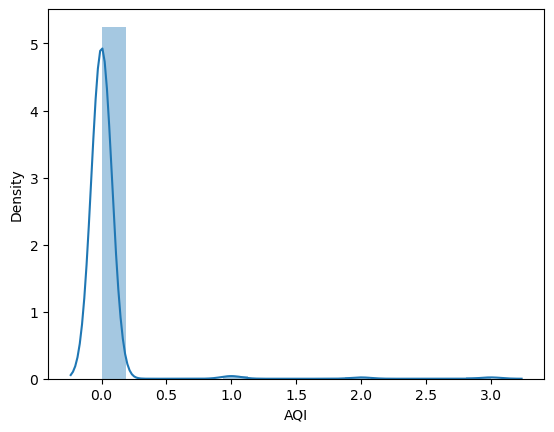

In [41]:
sns.distplot(y_test-xgb_pred)

In [27]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train,y_train)
rf_pred = np.round(rf_reg.predict(X_test))
print(f'MAE:{mean_absolute_error(y_test, rf_pred)}\n RMSE:{mean_squared_error(y_test, rf_pred, squared=False)}')

MAE:0.02734375
 RMSE:0.2072890493972125


In [28]:
results_comp = {'true_values': y_test, 'predictions':rf_pred}
pd.DataFrame(results_comp)

true_values  predictions
943            43         43.0
1790           85         85.0
1599           76         76.0
2149           65         65.0
487           112        112.0
...           ...          ...
306            58         58.0
2061          115        115.0
1465           86         86.0
2137           62         62.0
664            62         62.0

[256 rows x 2 columns]

<Axes: xlabel='AQI', ylabel='Density'>

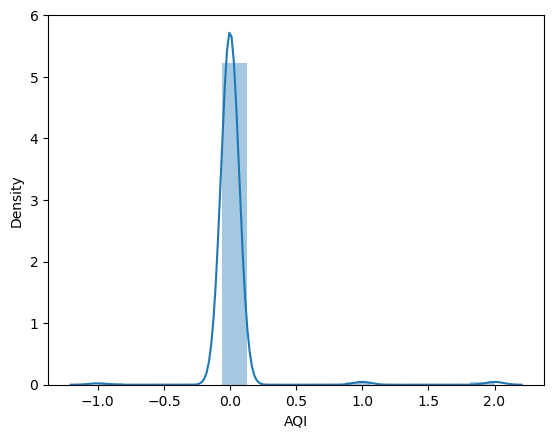

In [29]:
sns.distplot(y_test-rf_pred)

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

mae = mean_absolute_error(y_test, lr_pred)
rmse = mean_squared_error(y_test, lr_pred, squared=False)
r2 = r2_score(y_test, lr_pred)

print("Linear Regression")
print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)

Linear Regression
MAE: 8.992806499463768e-15
RMSE: 1.111110848057422e-14
R2 Score: 1.0


<Axes: xlabel='AQI', ylabel='Density'>

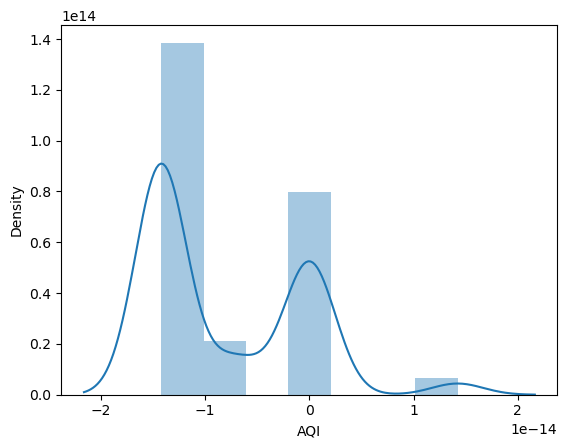

In [31]:
sns.distplot(y_test-lr_pred)

In [32]:
results_comp = {'true_values': y_test, 'predictions':lr_pred}
pd.DataFrame(results_comp)

true_values  predictions
943            43         43.0
1790           85         85.0
1599           76         76.0
2149           65         65.0
487           112        112.0
...           ...          ...
306            58         58.0
2061          115        115.0
1465           86         86.0
2137           62         62.0
664            62         62.0

[256 rows x 2 columns]

In [33]:
from sklearn.svm import SVR

svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_pred = svr_model.predict(X_test)

print("SVR")
print("MAE:", mean_absolute_error(y_test, svr_pred))
print("RMSE:", mean_squared_error(y_test, svr_pred, squared=False))
print("R2 Score:", r2_score(y_test, svr_pred))

SVR
MAE: 1.2544430244365894
RMSE: 6.1042418936957725
R2 Score: 0.9536574633074673


In [34]:
results_comp = {'true_values': y_test, 'predictions':svr_pred}
pd.DataFrame(results_comp)

true_values  predictions
943            43    43.335237
1790           85    84.938767
1599           76    76.055510
2149           65    65.099689
487           112   112.115793
...           ...          ...
306            58    57.969572
2061          115   115.152272
1465           86    85.929180
2137           62    62.057458
664            62    62.057458

[256 rows x 2 columns]

<Axes: xlabel='AQI', ylabel='Density'>

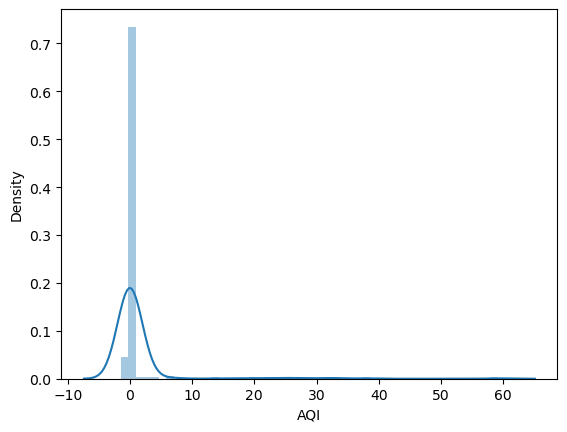

In [35]:
sns.distplot(y_test-svr_pred)


In [36]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

print("KNN Regressor")
print("MAE:", mean_absolute_error(y_test, knn_pred))
print("RMSE:", mean_squared_error(y_test, knn_pred, squared=False))
print("R2 Score:", r2_score(y_test, knn_pred))

KNN Regressor
MAE: 0.05937500000000018
RMSE: 0.44370598373247183
R2 Score: 0.9997551461690493


In [37]:
results_comp = {'true_values': y_test, 'predictions':knn_pred}
pd.DataFrame(results_comp)

true_values  predictions
943            43         43.0
1790           85         85.0
1599           76         76.0
2149           65         65.0
487           112        112.0
...           ...          ...
306            58         58.0
2061          115        115.0
1465           86         86.0
2137           62         62.0
664            62         62.0

[256 rows x 2 columns]

<Axes: xlabel='AQI', ylabel='Density'>

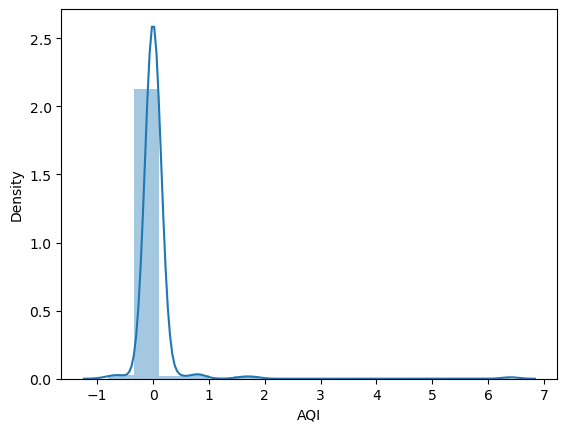

In [38]:
sns.distplot(y_test-knn_pred)

In [40]:
with open('Bangalore_model.pkl', 'wb') as f:
    pickle.dump(rf_reg, f)

print("Random Forest model saved successfully.")

Random Forest model saved successfully.
